In [ ]:
# IE7275 Project
## Pilots physiological dataset

In [2]:
# Include Libraries
import numpy as np
import pandas as pd
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
# Models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set working directory
%cd /content/drive/MyDrive/Colab Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [4]:
#Read the csv data file as a dataframe
#df_pilot = pd.read_csv('pilot_data.csv')

#locally saved
df_pilot = pd.read_csv(r'C:\Users\jeffj\OneDrive\Desktop\Northeastern\04_7275 Data Mining in Engineering\7275_Project\reducing-commercial-aviation-fatalities\train.csv')

#Convert to a parquet file
#df_pilot.to_parquet('pilot.parquet')

#Read the parquet file as a dataframe
#df_pilot = pd.read_parquet('pilot.parquet')

In [ ]:
## Data Inspection

In [4]:
# Find the dimensions
df_pilot.shape

(4867421, 28)

In [ ]:
# check visually
print(df_pilot.head())

   crew experiment      time  seat   eeg_fp1     eeg_f7     eeg_f8     eeg_t4  \
0     1         CA  0.011719     1  -5.28545  26.775801  -9.527310 -12.793200   
1     1         CA  0.015625     1  -2.42842  28.430901  -9.323510  -3.757230   
2     1         CA  0.019531     1  10.67150  30.420200  15.350700  24.724001   
3     1         CA  0.023438     1  11.45250  25.609800   2.433080  12.412500   
4     1         CA  0.027344     1   7.28321  25.942600   0.113564   5.748000   

      eeg_t6     eeg_t5  ...     eeg_c4     eeg_p4    eeg_poz   eeg_c3  \
0  16.717800  33.737499  ...  37.368999  17.437599  19.201900  20.5968   
1  15.969300  30.443600  ...  31.170799  19.399700  19.689501  21.3547   
2  16.143101  32.142799  ... -12.012600  19.396299  23.171700  22.4076   
3  20.533300  31.494101  ...  18.574100  23.156401  22.641199  19.3367   
4  19.833599  28.753599  ...   6.555440  22.754700  22.670300  20.2932   

    eeg_cz     eeg_o2     ecg           r         gsr  event  
0 -3.

In [ ]:
print(df_pilot.dtypes)
print(df_pilot.columns)

crew            int64
experiment     object
time          float64
seat            int64
eeg_fp1       float64
eeg_f7        float64
eeg_f8        float64
eeg_t4        float64
eeg_t6        float64
eeg_t5        float64
eeg_t3        float64
eeg_fp2       float64
eeg_o1        float64
eeg_p3        float64
eeg_pz        float64
eeg_f3        float64
eeg_fz        float64
eeg_f4        float64
eeg_c4        float64
eeg_p4        float64
eeg_poz       float64
eeg_c3        float64
eeg_cz        float64
eeg_o2        float64
ecg           float64
r             float64
gsr           float64
event          object
dtype: object
Index(['crew', 'experiment', 'time', 'seat', 'eeg_fp1', 'eeg_f7', 'eeg_f8',
       'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
       'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz',
       'eeg_c3', 'eeg_cz', 'eeg_o2', 'ecg', 'r', 'gsr', 'event'],
      dtype='object')


In [ ]:
# check null values
df_pilot.isnull().sum()

crew          0
experiment    0
time          0
seat          0
eeg_fp1       0
eeg_f7        0
eeg_f8        0
eeg_t4        0
eeg_t6        0
eeg_t5        0
eeg_t3        0
eeg_fp2       0
eeg_o1        0
eeg_p3        0
eeg_pz        0
eeg_f3        0
eeg_fz        0
eeg_f4        0
eeg_c4        0
eeg_p4        0
eeg_poz       0
eeg_c3        0
eeg_cz        0
eeg_o2        0
ecg           0
r             0
gsr           0
event         0
dtype: int64

In [ ]:
df_pilot.describe()

crew          time          seat       eeg_fp1        eeg_f7  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   5.538783e+00  1.782358e+02  4.999531e-01  3.746336e+00  1.360002e+00   
std    3.409353e+00  1.039592e+02  5.000000e-01  4.506763e+01  3.518923e+01   
min    1.000000e+00  3.000000e-03  0.000000e+00 -1.361360e+03 -1.581330e+03   
25%    3.000000e+00  8.808100e+01  0.000000e+00 -9.200250e+00 -8.325150e+00   
50%    5.000000e+00  1.769297e+02  0.000000e+00  3.819020e-01  4.264100e-02   
75%    7.000000e+00  2.683398e+02  1.000000e+00  1.030610e+01  8.753340e+00   
max    1.300000e+01  3.603711e+02  1.000000e+00  1.972240e+03  2.048790e+03   

             eeg_f8        eeg_t4        eeg_t6        eeg_t5        eeg_t3  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   1.213644e+00  7.350926e-02  7.845481e-02  8.675488e-02  2.299909e-01   
std    3.519242e+01  2.431472e+01  1.803932e+01  1.832606e+01  2.531132e+01   
min   -1.643950e+03 -1.516640e+03 -1.220510e+03 -1.266430e+03 -1.279940e+03   
25%   -8.767610e+00 -7.367240e+00 -6.102000e+00 -6.007260e+00 -6.904030e+00   
50%    1.140390e-01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    9.282560e+00  7.437780e+00  6.176630e+00  6.086460e+00  7.071460e+00   
max    2.145710e+03  1.731880e+03  9.009370e+02  1.176540e+03  1.514820e+03   

       ...        eeg_f4        eeg_c4        eeg_p4       eeg_poz  \
count  ...  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   ...  1.208597e+00  6.050047e-01  2.413972e-01  1.947635e-01   
std    ...  4.205516e+01  2.052105e+01  1.660196e+01  1.833801e+01   
min    ... -2.333830e+03 -1.212030e+03 -1.228030e+03 -1.229130e+03   
25%    ... -9.306430e+00 -7.495970e+00 -6.713860e+00 -6.774840e+00   
50%    ...  5.667500e-02  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  9.775770e+00  7.765670e+00  6.831320e+00  6.905020e+00   
max    ...  2.034170e+03  8.917290e+02  9.080890e+02  1.435800e+03   

             eeg_c3        eeg_cz        eeg_o2           ecg             r  \
count  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06  4.867421e+06   
mean   6.243715e-01  4.429119e-01  2.393738e-01  5.285460e+03  7.376090e+02   
std    1.975695e+01  1.974815e+01  2.351859e+01  1.214126e+04  8.187979e+01   
min   -1.230480e+03 -6.962790e+02 -1.176370e+03 -1.858570e+04  4.820600e+02   
25%   -7.161160e+00 -7.817650e+00 -6.526950e+00 -2.550070e+03  6.631430e+02   
50%    0.000000e+00  0.000000e+00  0.000000e+00  5.920510e+03  7.434380e+02   
75%    7.466520e+00  8.025190e+00  6.615180e+00  1.029010e+04  8.134120e+02   
max    9.284070e+02  6.136690e+02  2.443550e+03  3.418830e+04  8.401840e+02   

                gsr  
count  4.867421e+06  
mean   8.518467e+02  
std    5.039324e+02  
min    0.000000e+00  
25%    5.241140e+02  
50%    7.701970e+02  
75%    1.197120e+03  
max    1.999860e+03  

[8 rows x 26 columns]

In [ ]:
df_pilot['crew'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 13])

In [ ]:
# there are 9 unique crews, each with two pilots seat 1 and 0

In [ ]:
df_pilot['experiment'].unique()

array(['CA', 'DA', 'SS'], dtype=object)

In [ ]:
# Experiment type
# CA = Channelized Attention
# DA = Diverted Attention
# SS = Startle/Surprise

In [ ]:
df_pilot['event'].unique()

array(['A', 'C', 'D', 'B'], dtype=object)

In [ ]:
# event type
# A = Baseline
# B = SS
# C = CA
# D = DA

# for each experiment a crew was exposed to a single experiment type, during which they were at state of either
# baseline or event. i.e. during a Diverted Attention experiment the crew was either at a state of 'A' (baseline)
# or 'D' (DA)

In [ ]:
df_pilot.groupby(['crew', 'seat', 'event']).count()

experiment    time  eeg_fp1  eeg_f7  eeg_f8  eeg_t4  eeg_t6  \
crew seat event                                                                
1    0    A          117442  117442   117442  117442  117442  117442  117442   
          B            3837    3837     3837    3837    3837    3837    3837   
          C           90418   90418    90418   90418   90418   90418   90418   
          D           12074   12074    12074   12074   12074   12074   12074   
     1    A          118449  118449   118449  118449  118449  118449  118449   
...                     ...     ...      ...     ...     ...     ...     ...   
13   0    D           14609   14609    14609   14609   14609   14609   14609   
     1    A          162624  162624   162624  162624  162624  162624  162624   
          B            7681    7681     7681    7681    7681    7681    7681   
          C           91976   91976    91976   91976   91976   91976   91976   
          D           14067   14067    14067   14067   14067   14067   14067   

                 eeg_t5  eeg_t3  eeg_fp2  ...  eeg_f4  eeg_c4  eeg_p4  \
crew seat event                           ...                           
1    0    A      117442  117442   117442  ...  117442  117442  117442   
          B        3837    3837     3837  ...    3837    3837    3837   
          C       90418   90418    90418  ...   90418   90418   90418   
          D       12074   12074    12074  ...   12074   12074   12074   
     1    A      118449  118449   118449  ...  118449  118449  118449   
...                 ...     ...      ...  ...     ...     ...     ...   
13   0    D       14609   14609    14609  ...   14609   14609   14609   
     1    A      162624  162624   162624  ...  162624  162624  162624   
          B        7681    7681     7681  ...    7681    7681    7681   
          C       91976   91976    91976  ...   91976   91976   91976   
          D       14067   14067    14067  ...   14067   14067   14067   

                 eeg_poz  eeg_c3  eeg_cz  eeg_o2     ecg       r     gsr  
crew seat event                                                           
1    0    A       117442  117442  117442  117442  117442  117442  117442  
          B         3837    3837    3837    3837    3837    3837    3837  
          C        90418   90418   90418   90418   90418   90418   90418  
          D        12074   12074   12074   12074   12074   12074   12074  
     1    A       118449  118449  118449  118449  118449  118449  118449  
...                  ...     ...     ...     ...     ...     ...     ...  
13   0    D        14609   14609   14609   14609   14609   14609   14609  
     1    A       162624  162624  162624  162624  162624  162624  162624  
          B         7681    7681    7681    7681    7681    7681    7681  
          C        91976   91976   91976   91976   91976   91976   91976  
          D        14067   14067   14067   14067   14067   14067   14067  

[72 rows x 25 columns]

In [ ]:
# Raw data plots: features over time for a specific pilot of a specific crew and specific experiment

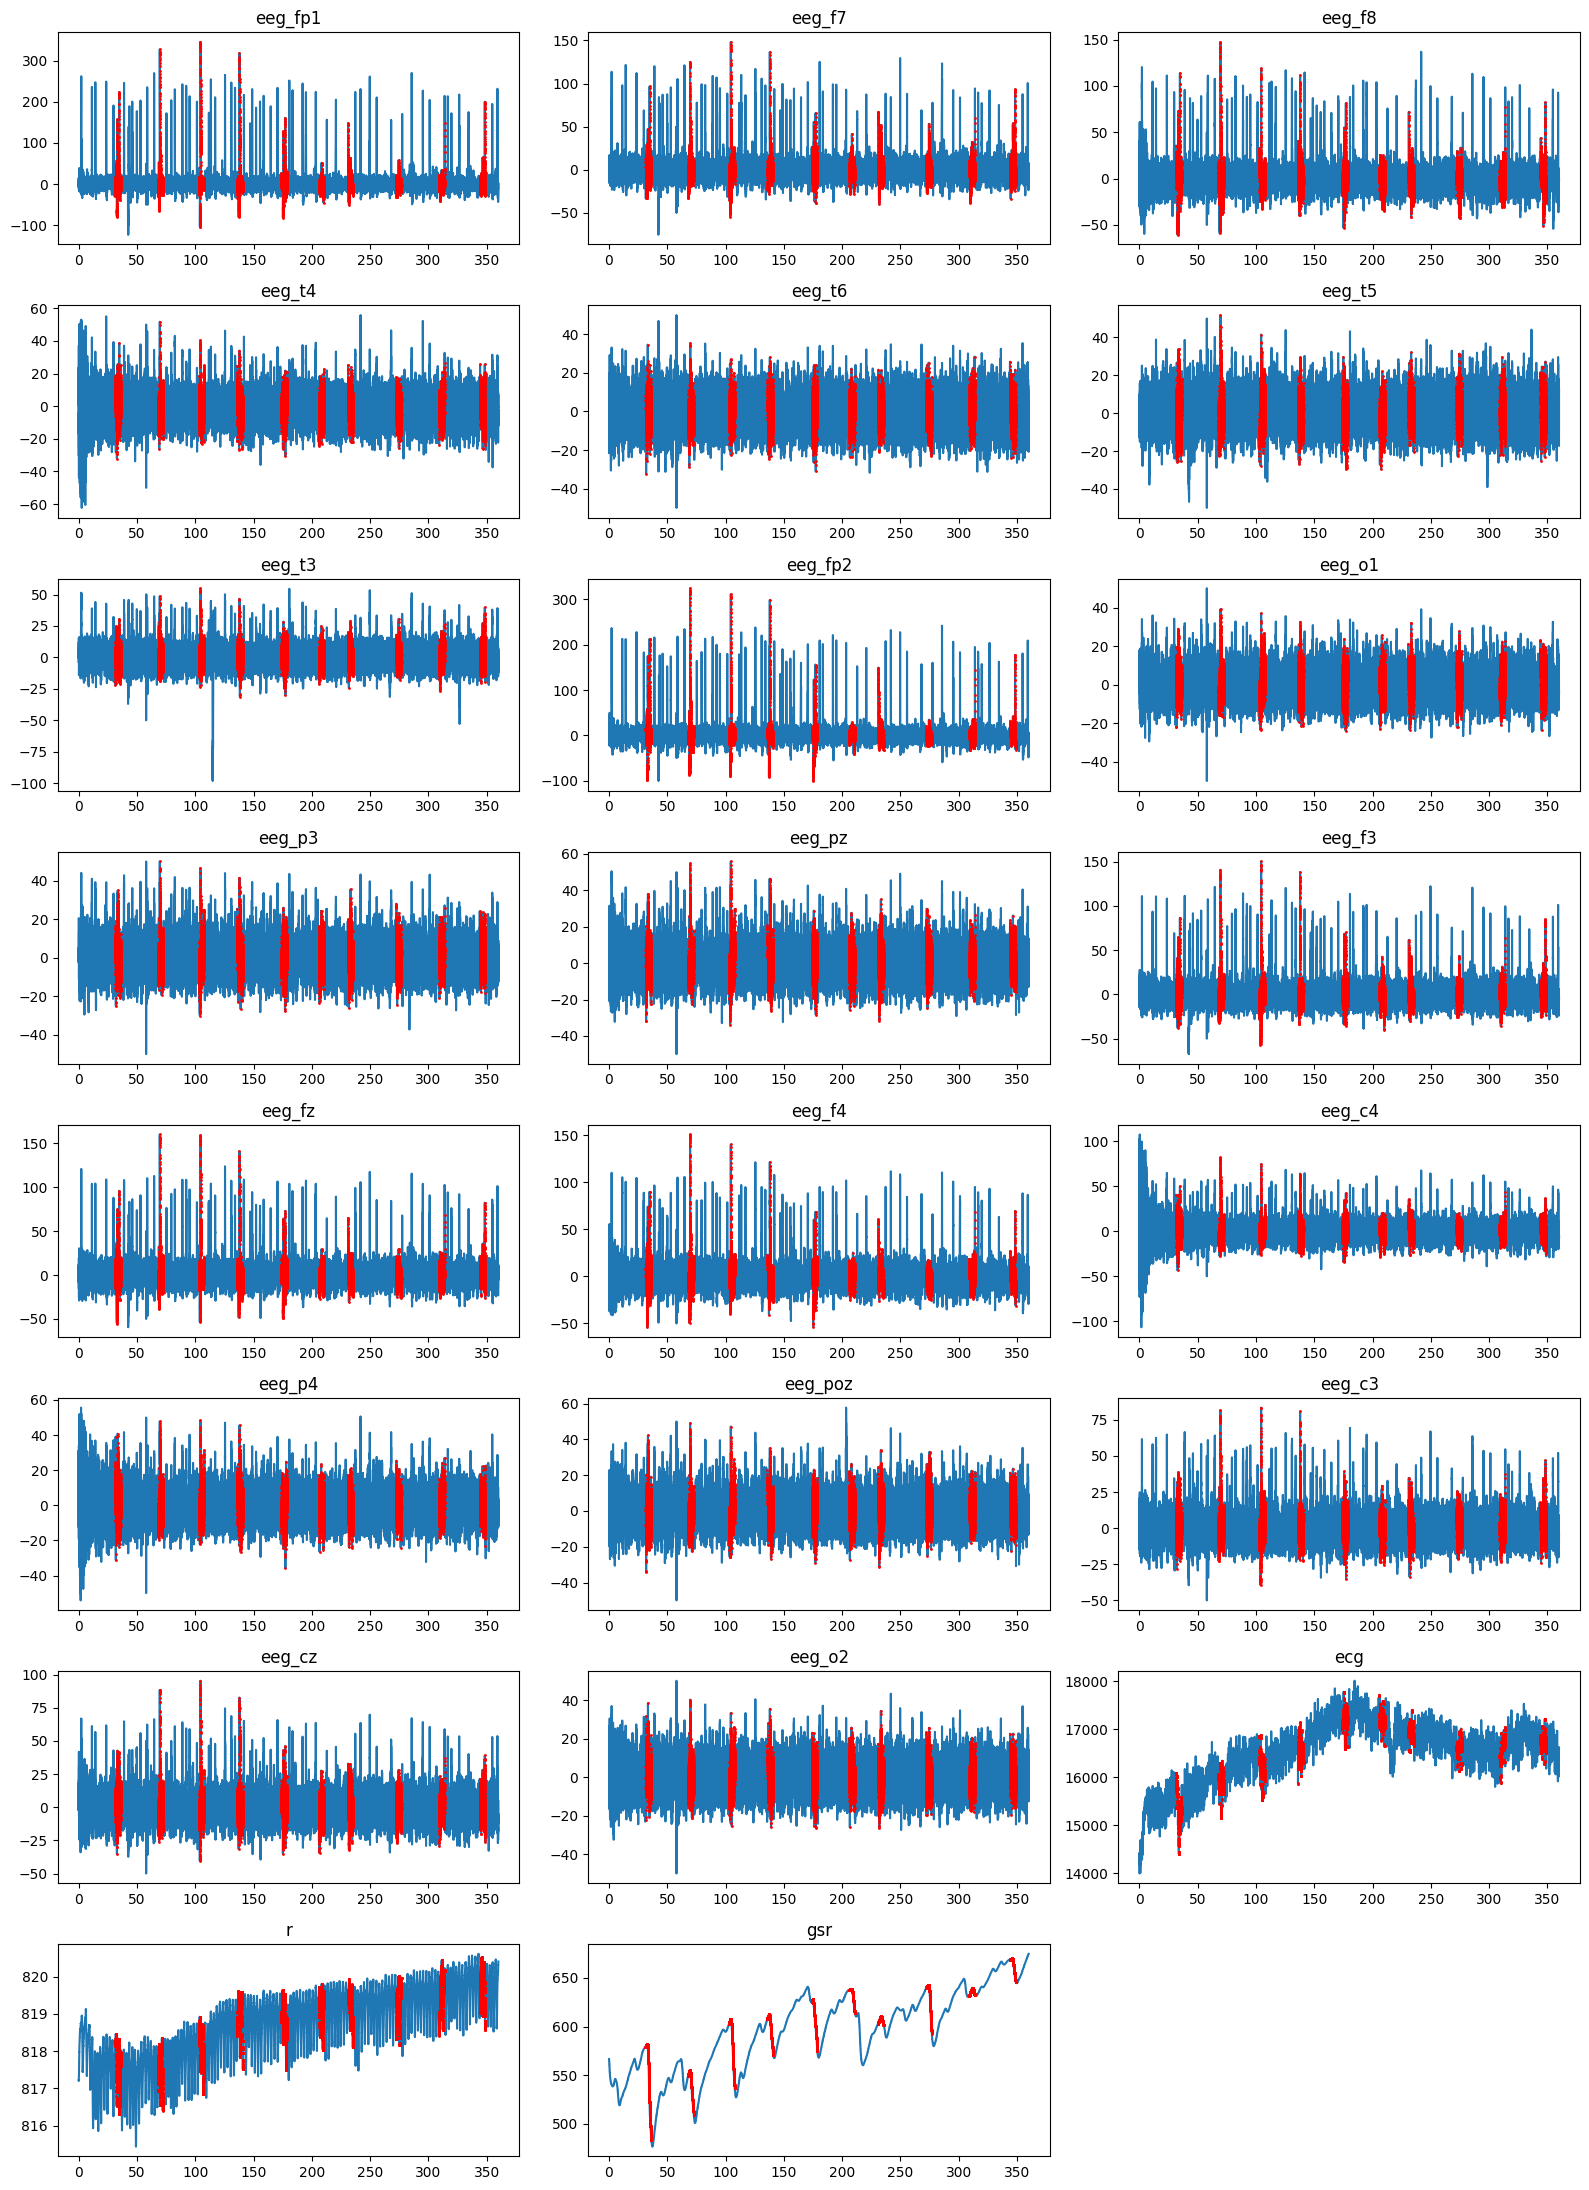

In [ ]:
# Crew 3, Pilot 1, Diverted Attention

crew = 3
seat = 1
exp = 'DA'
ev = 'D'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

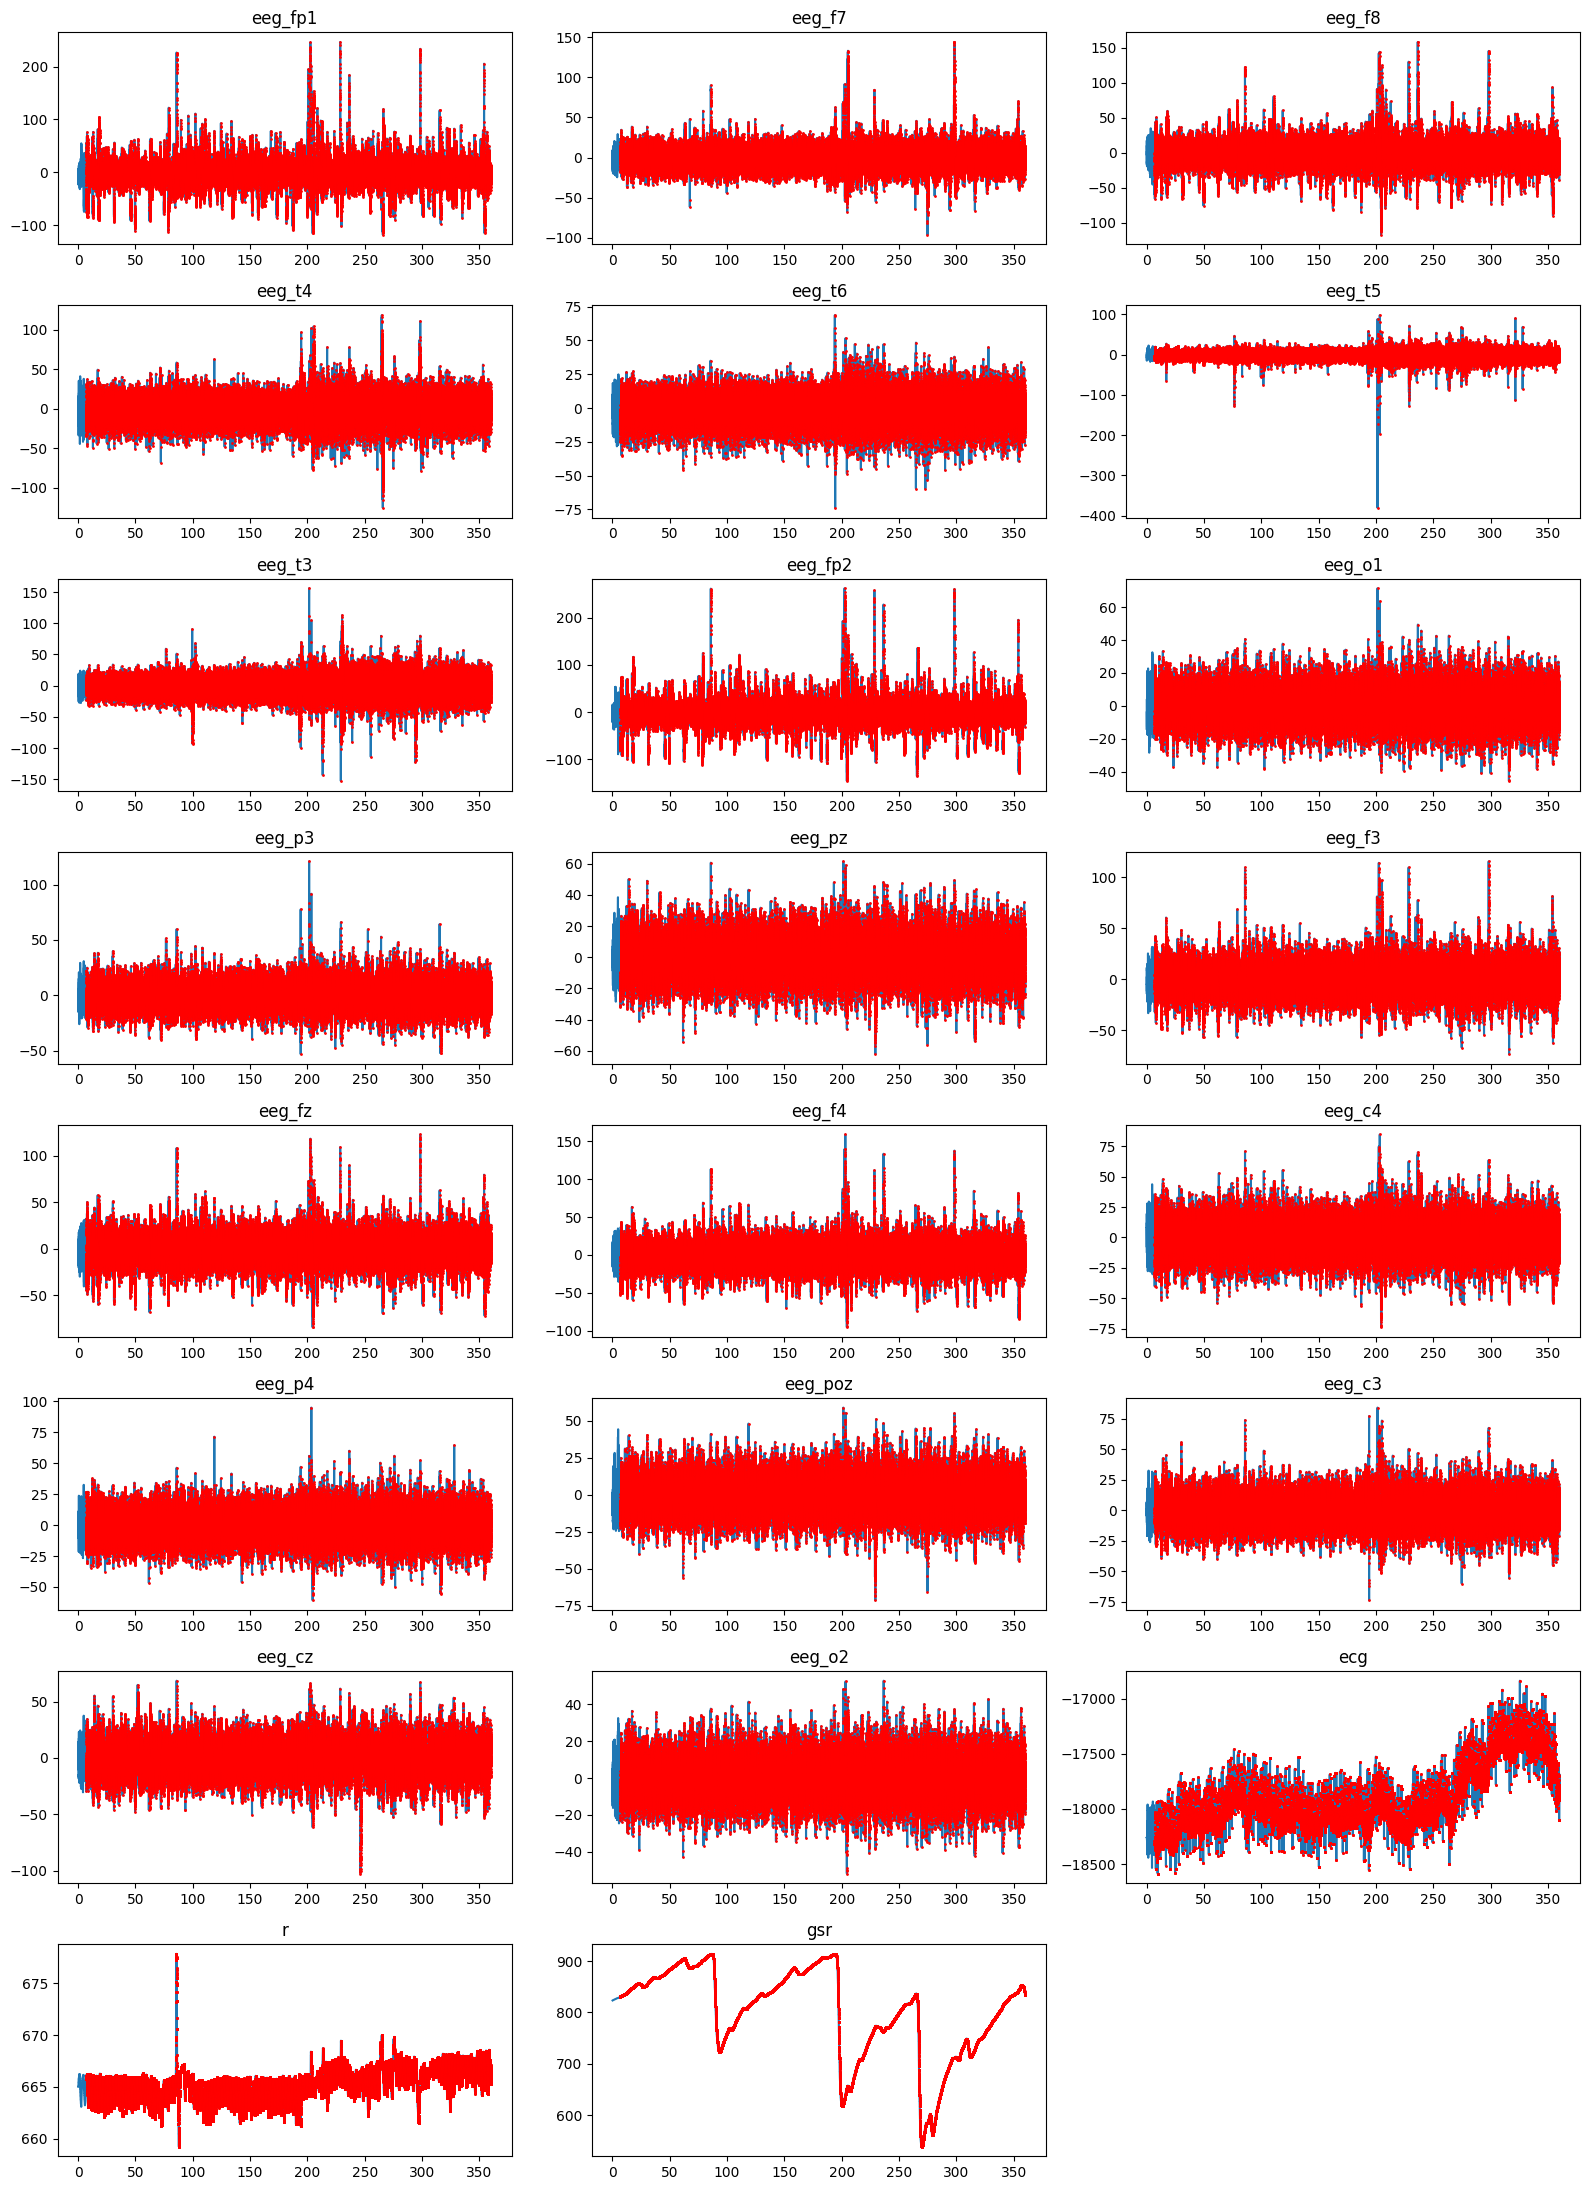

In [ ]:
# Crew 1, Pilot 0, Channelized Attention

crew = 1
seat = 0
exp = 'CA'
ev = 'C'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

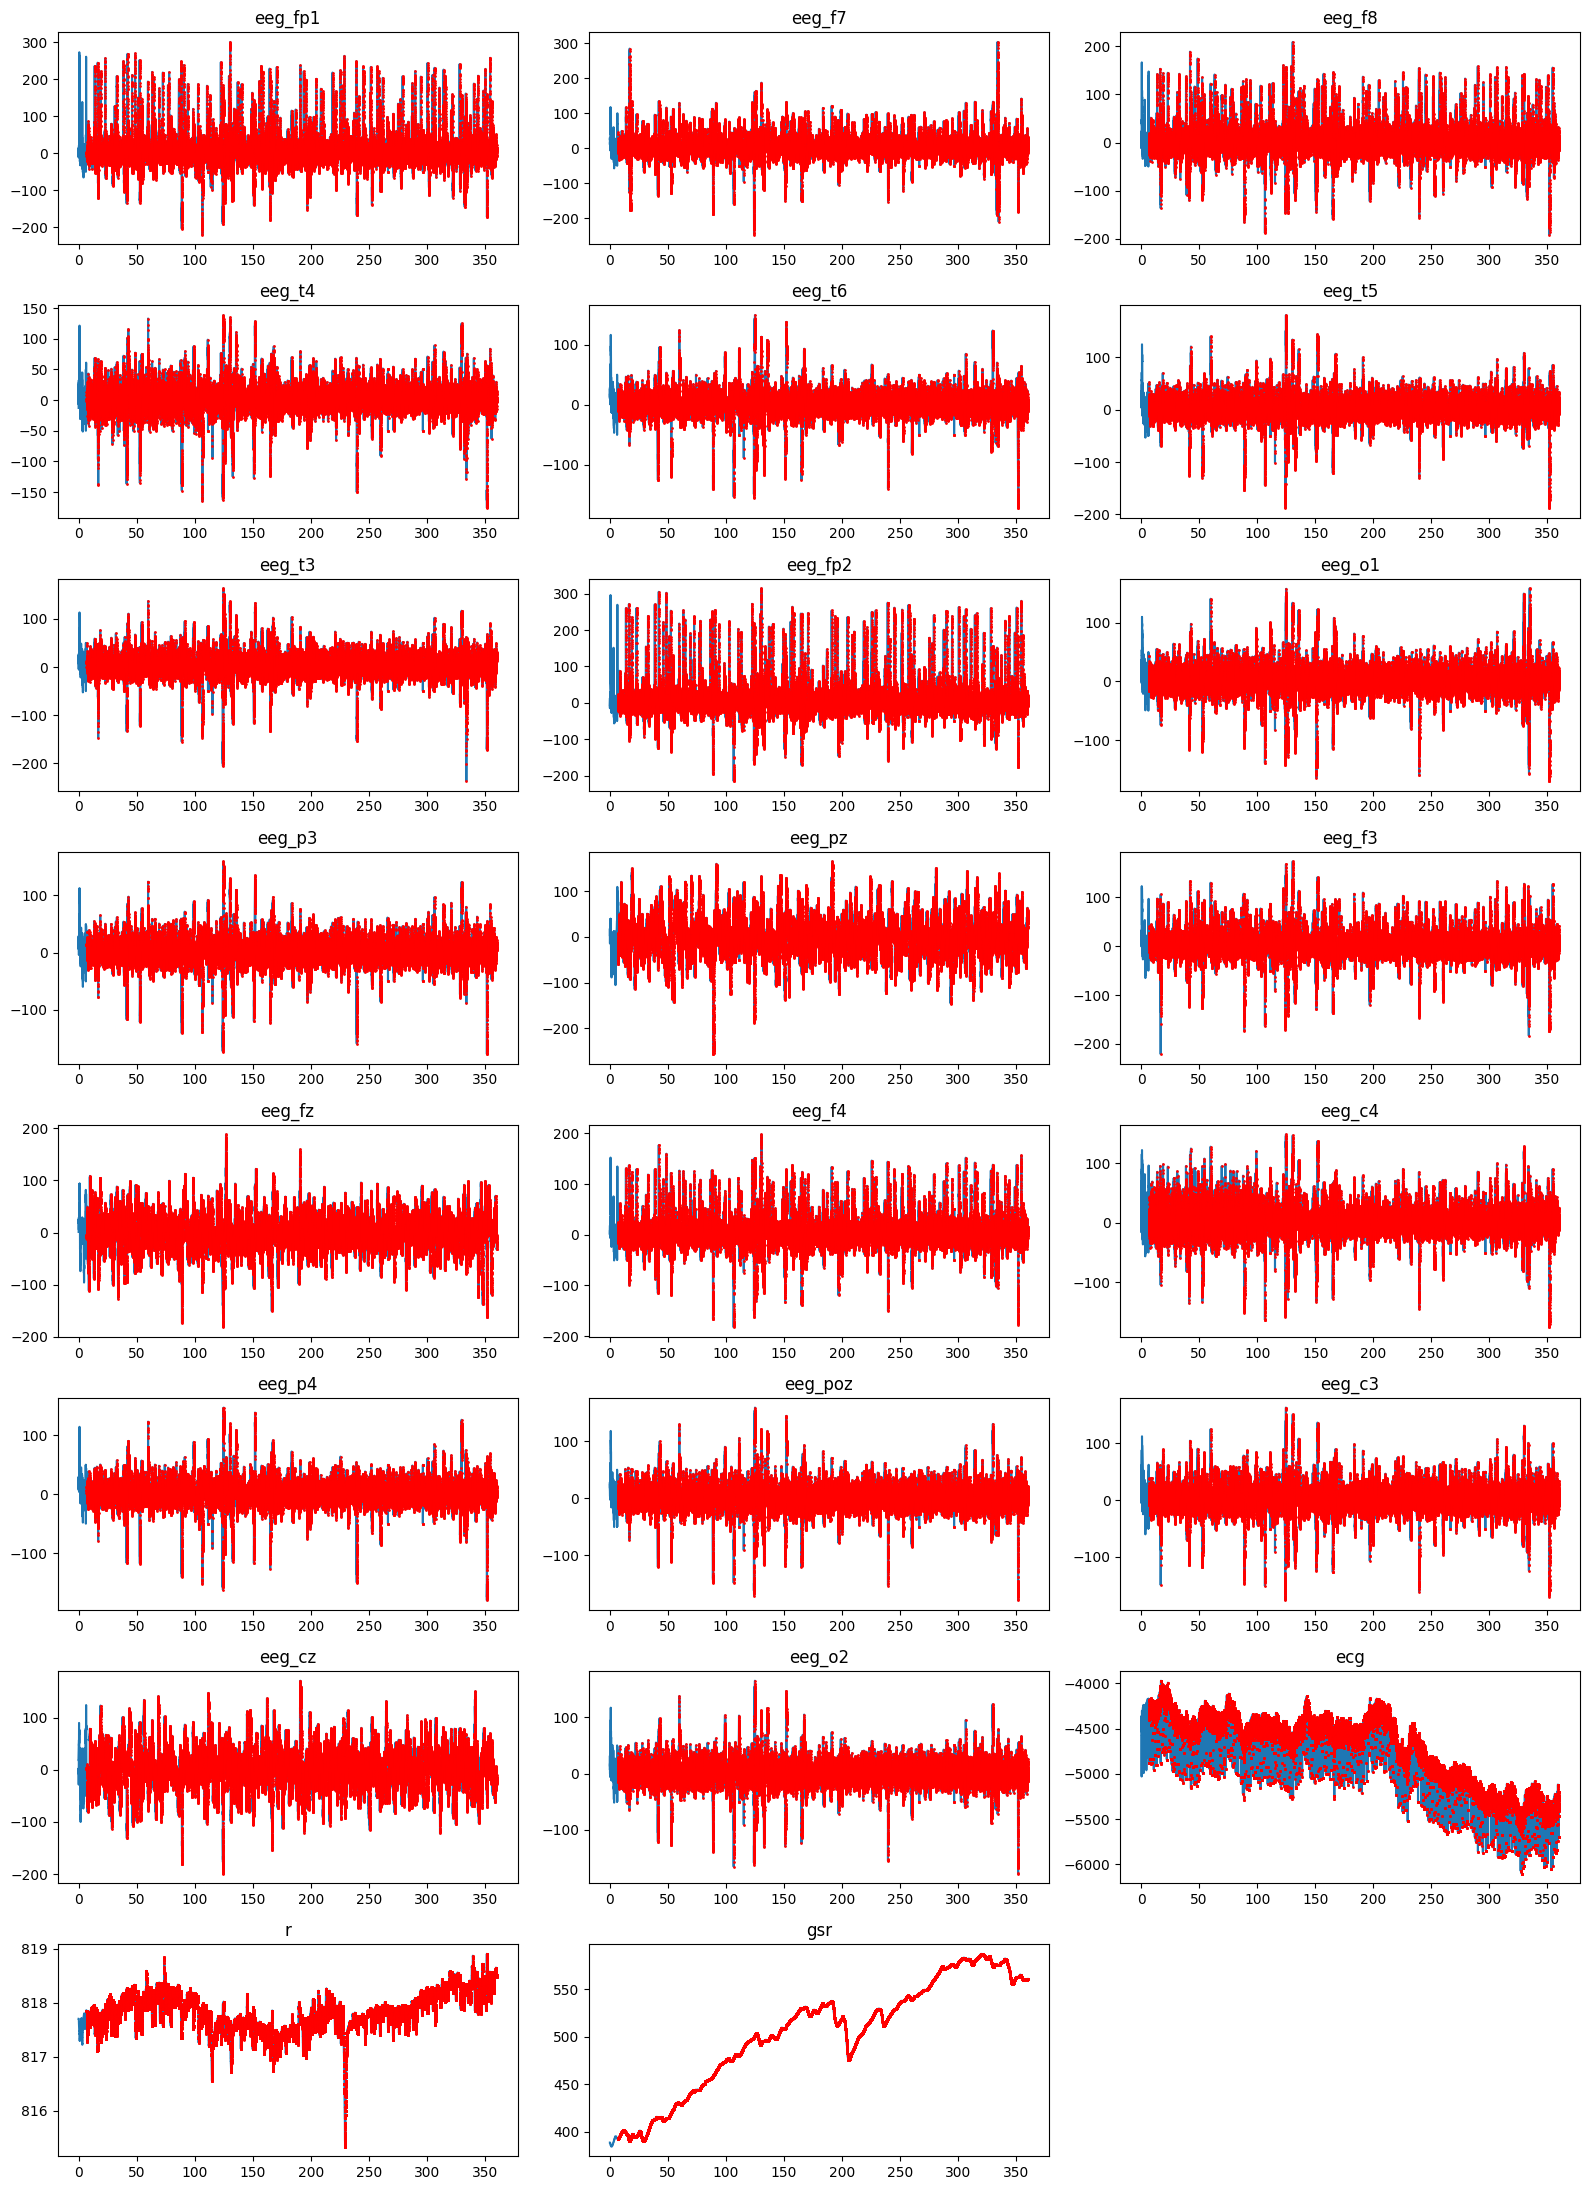

In [ ]:
# Crew 1, Pilot 1, Channelized Attention

crew = 1
seat = 1
exp = 'CA'
ev = 'C'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

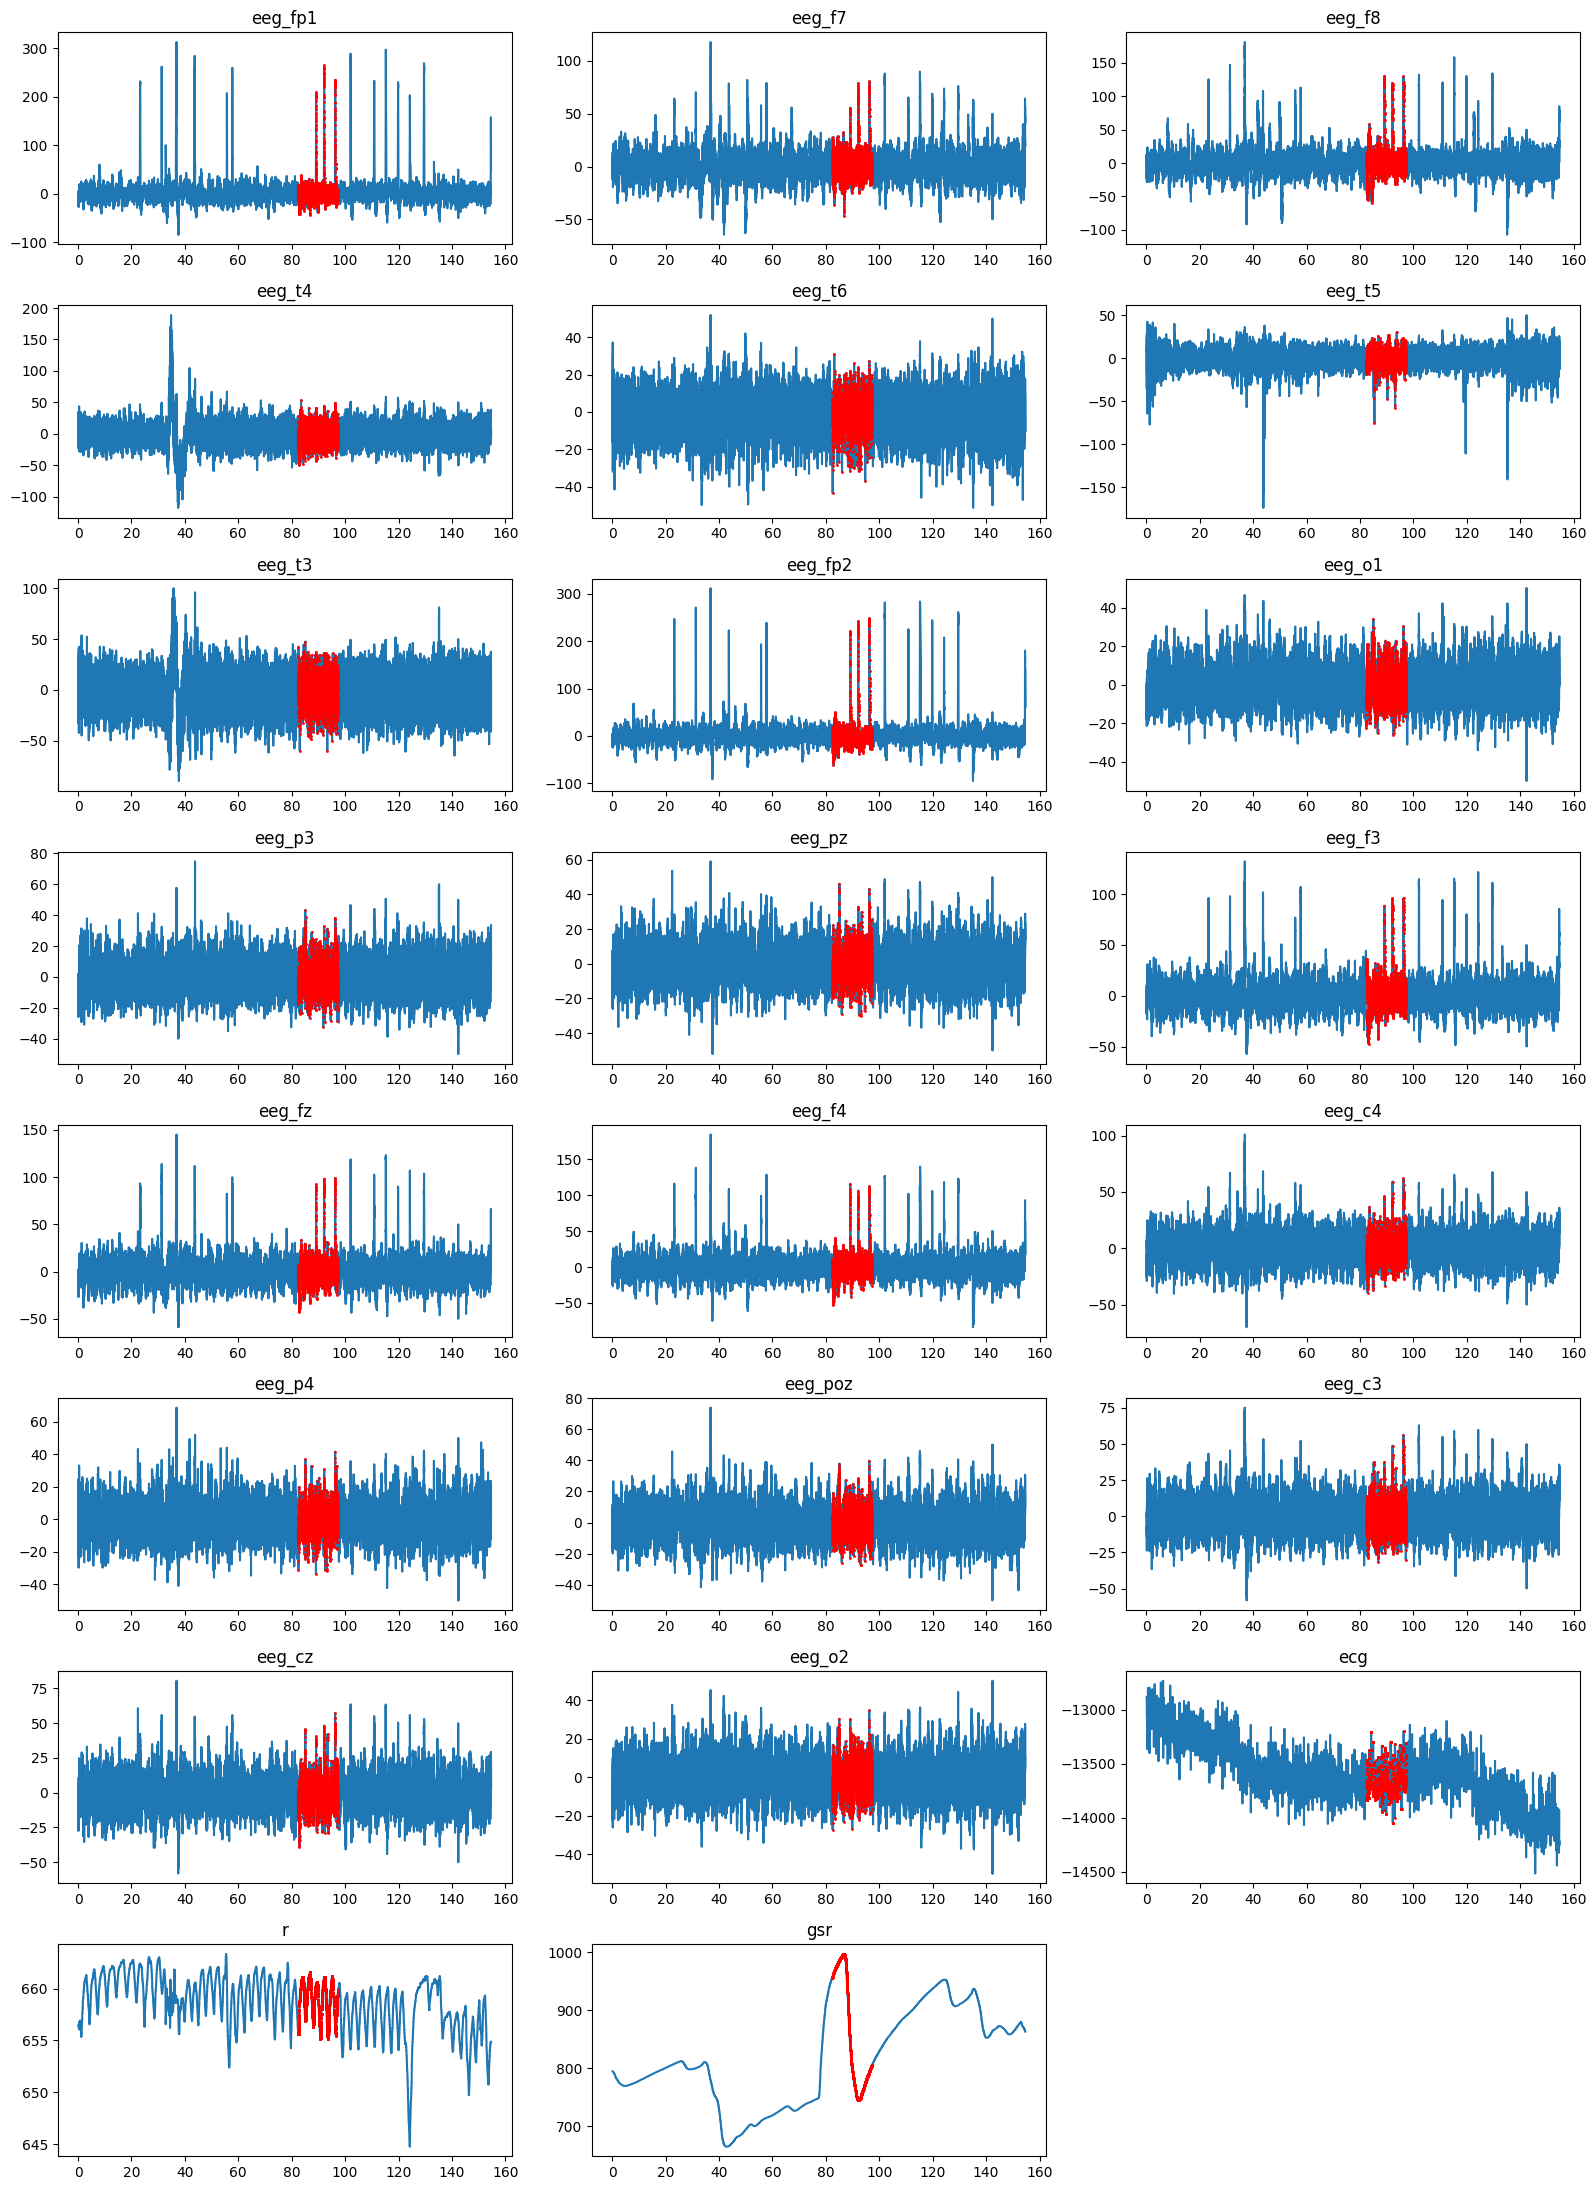

In [ ]:
# Crew 1, Pilot 0, Startle Surprise

crew = 1
seat = 0
exp = 'SS'
ev = 'B'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

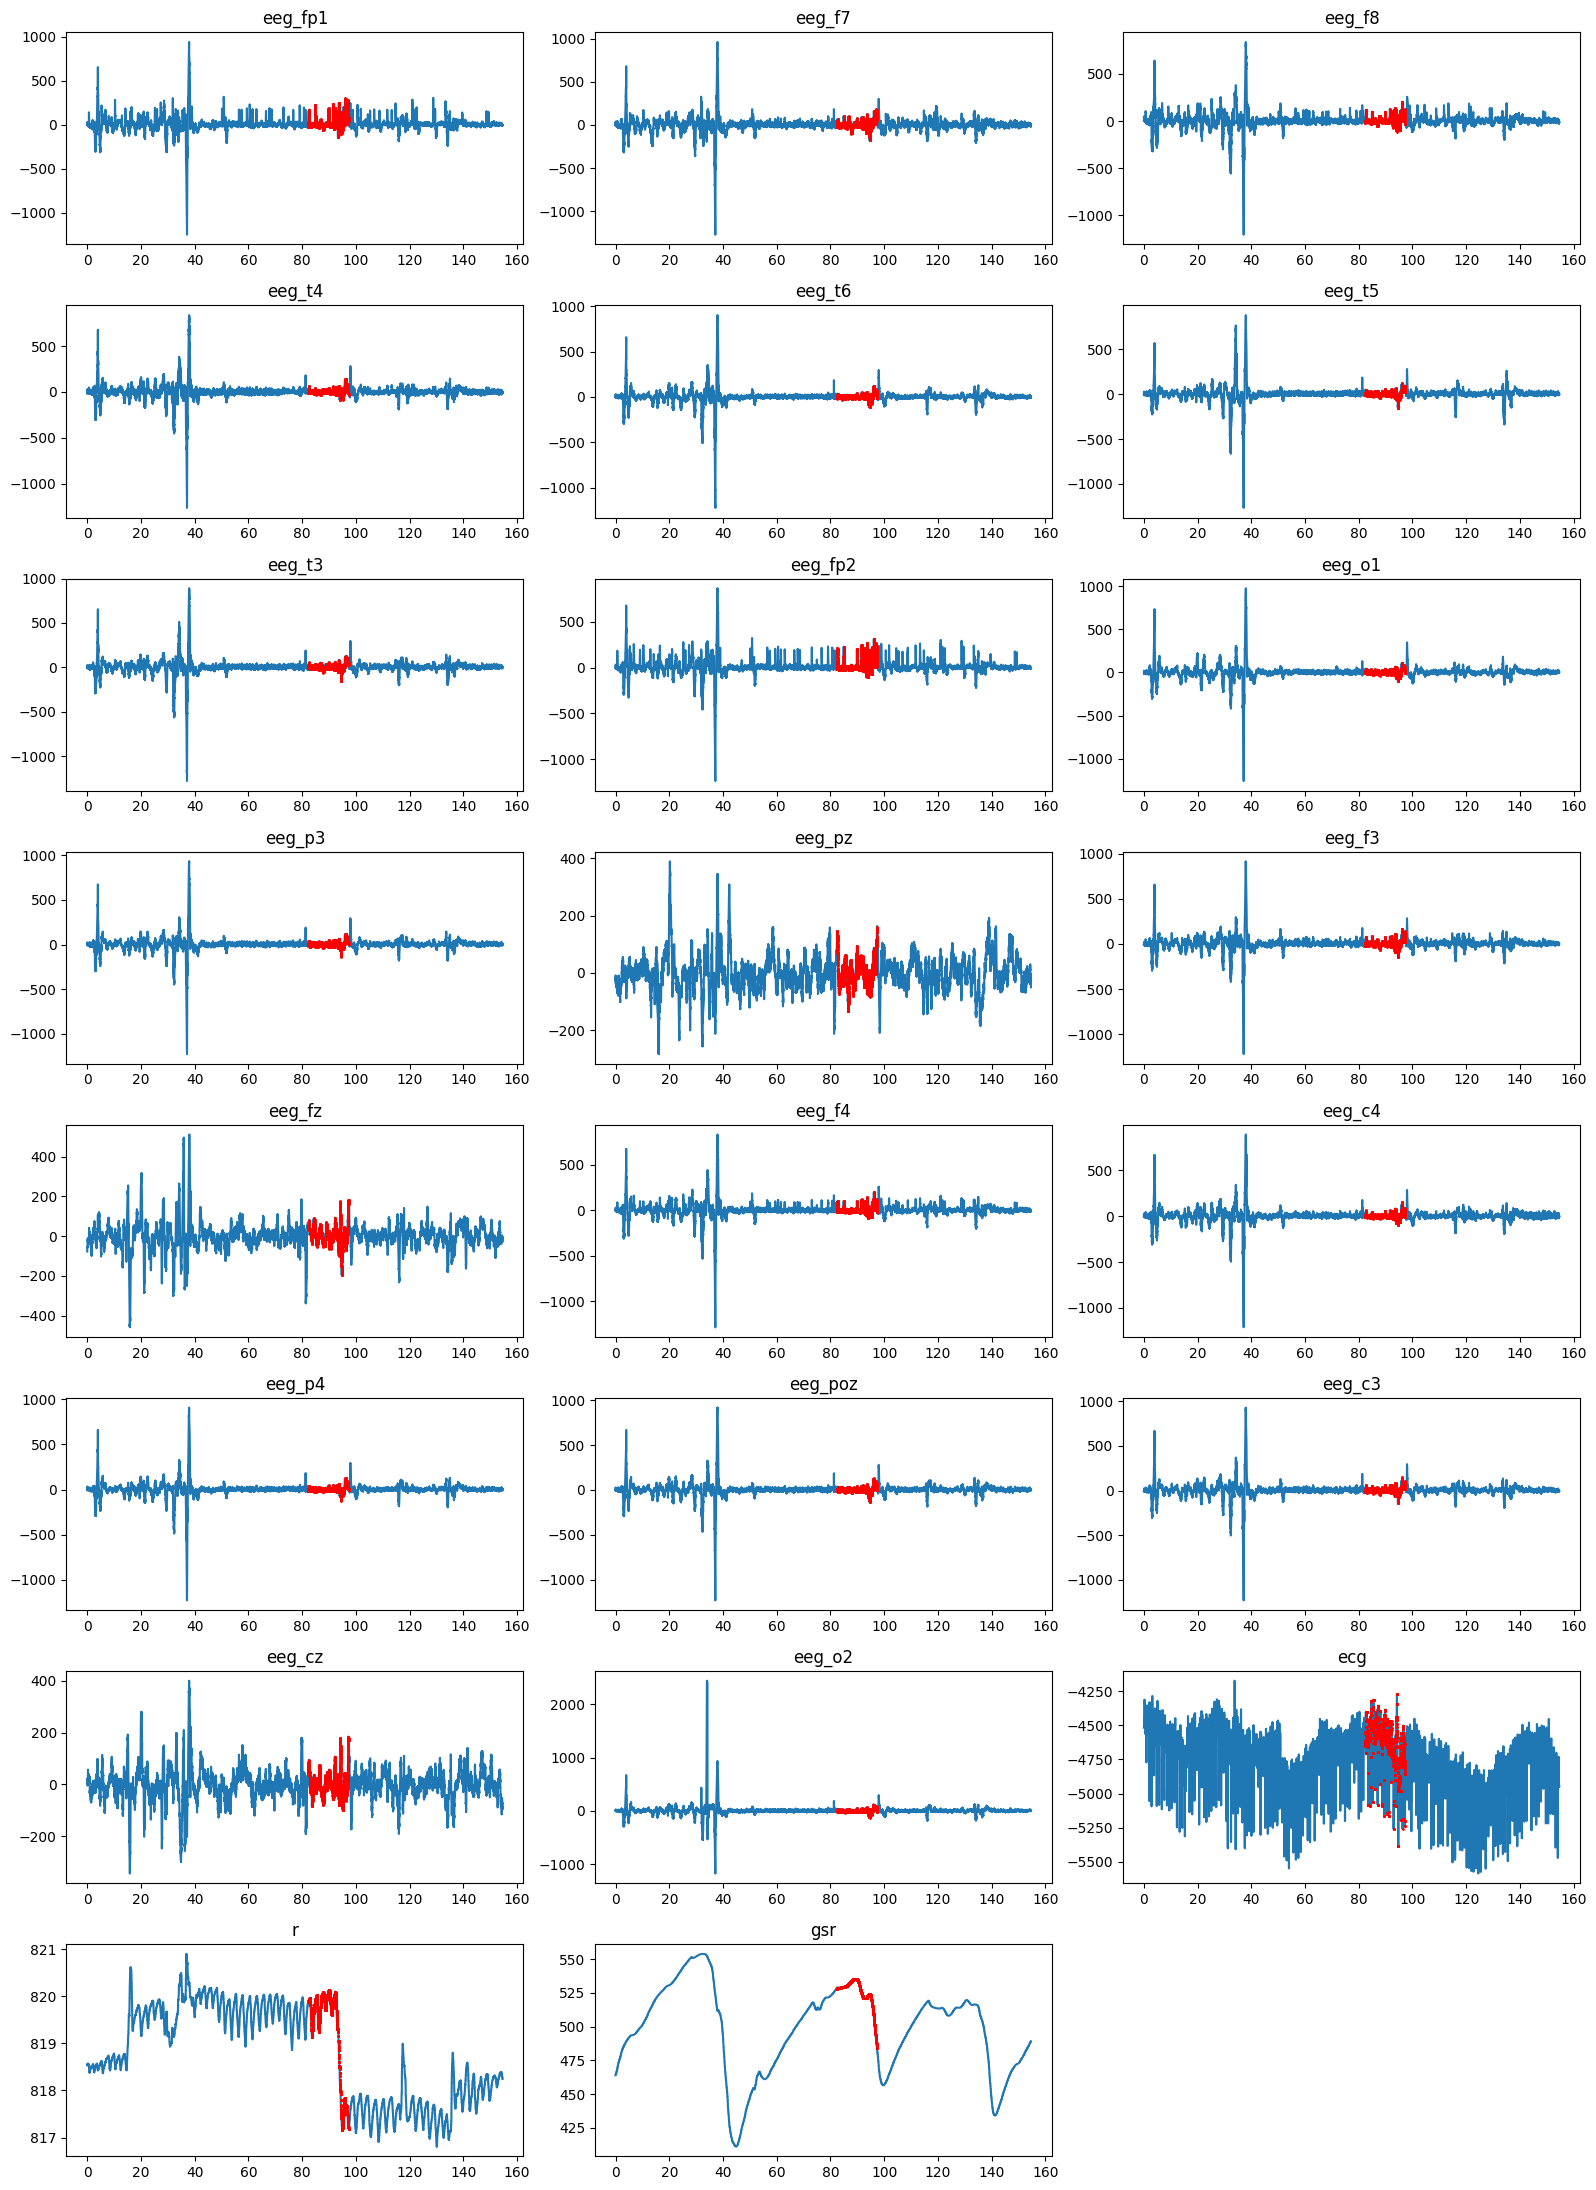

In [ ]:
# Crew 1, Pilot 0, Startle Surprise

crew = 1
seat = 1
exp = 'SS'
ev = 'B'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

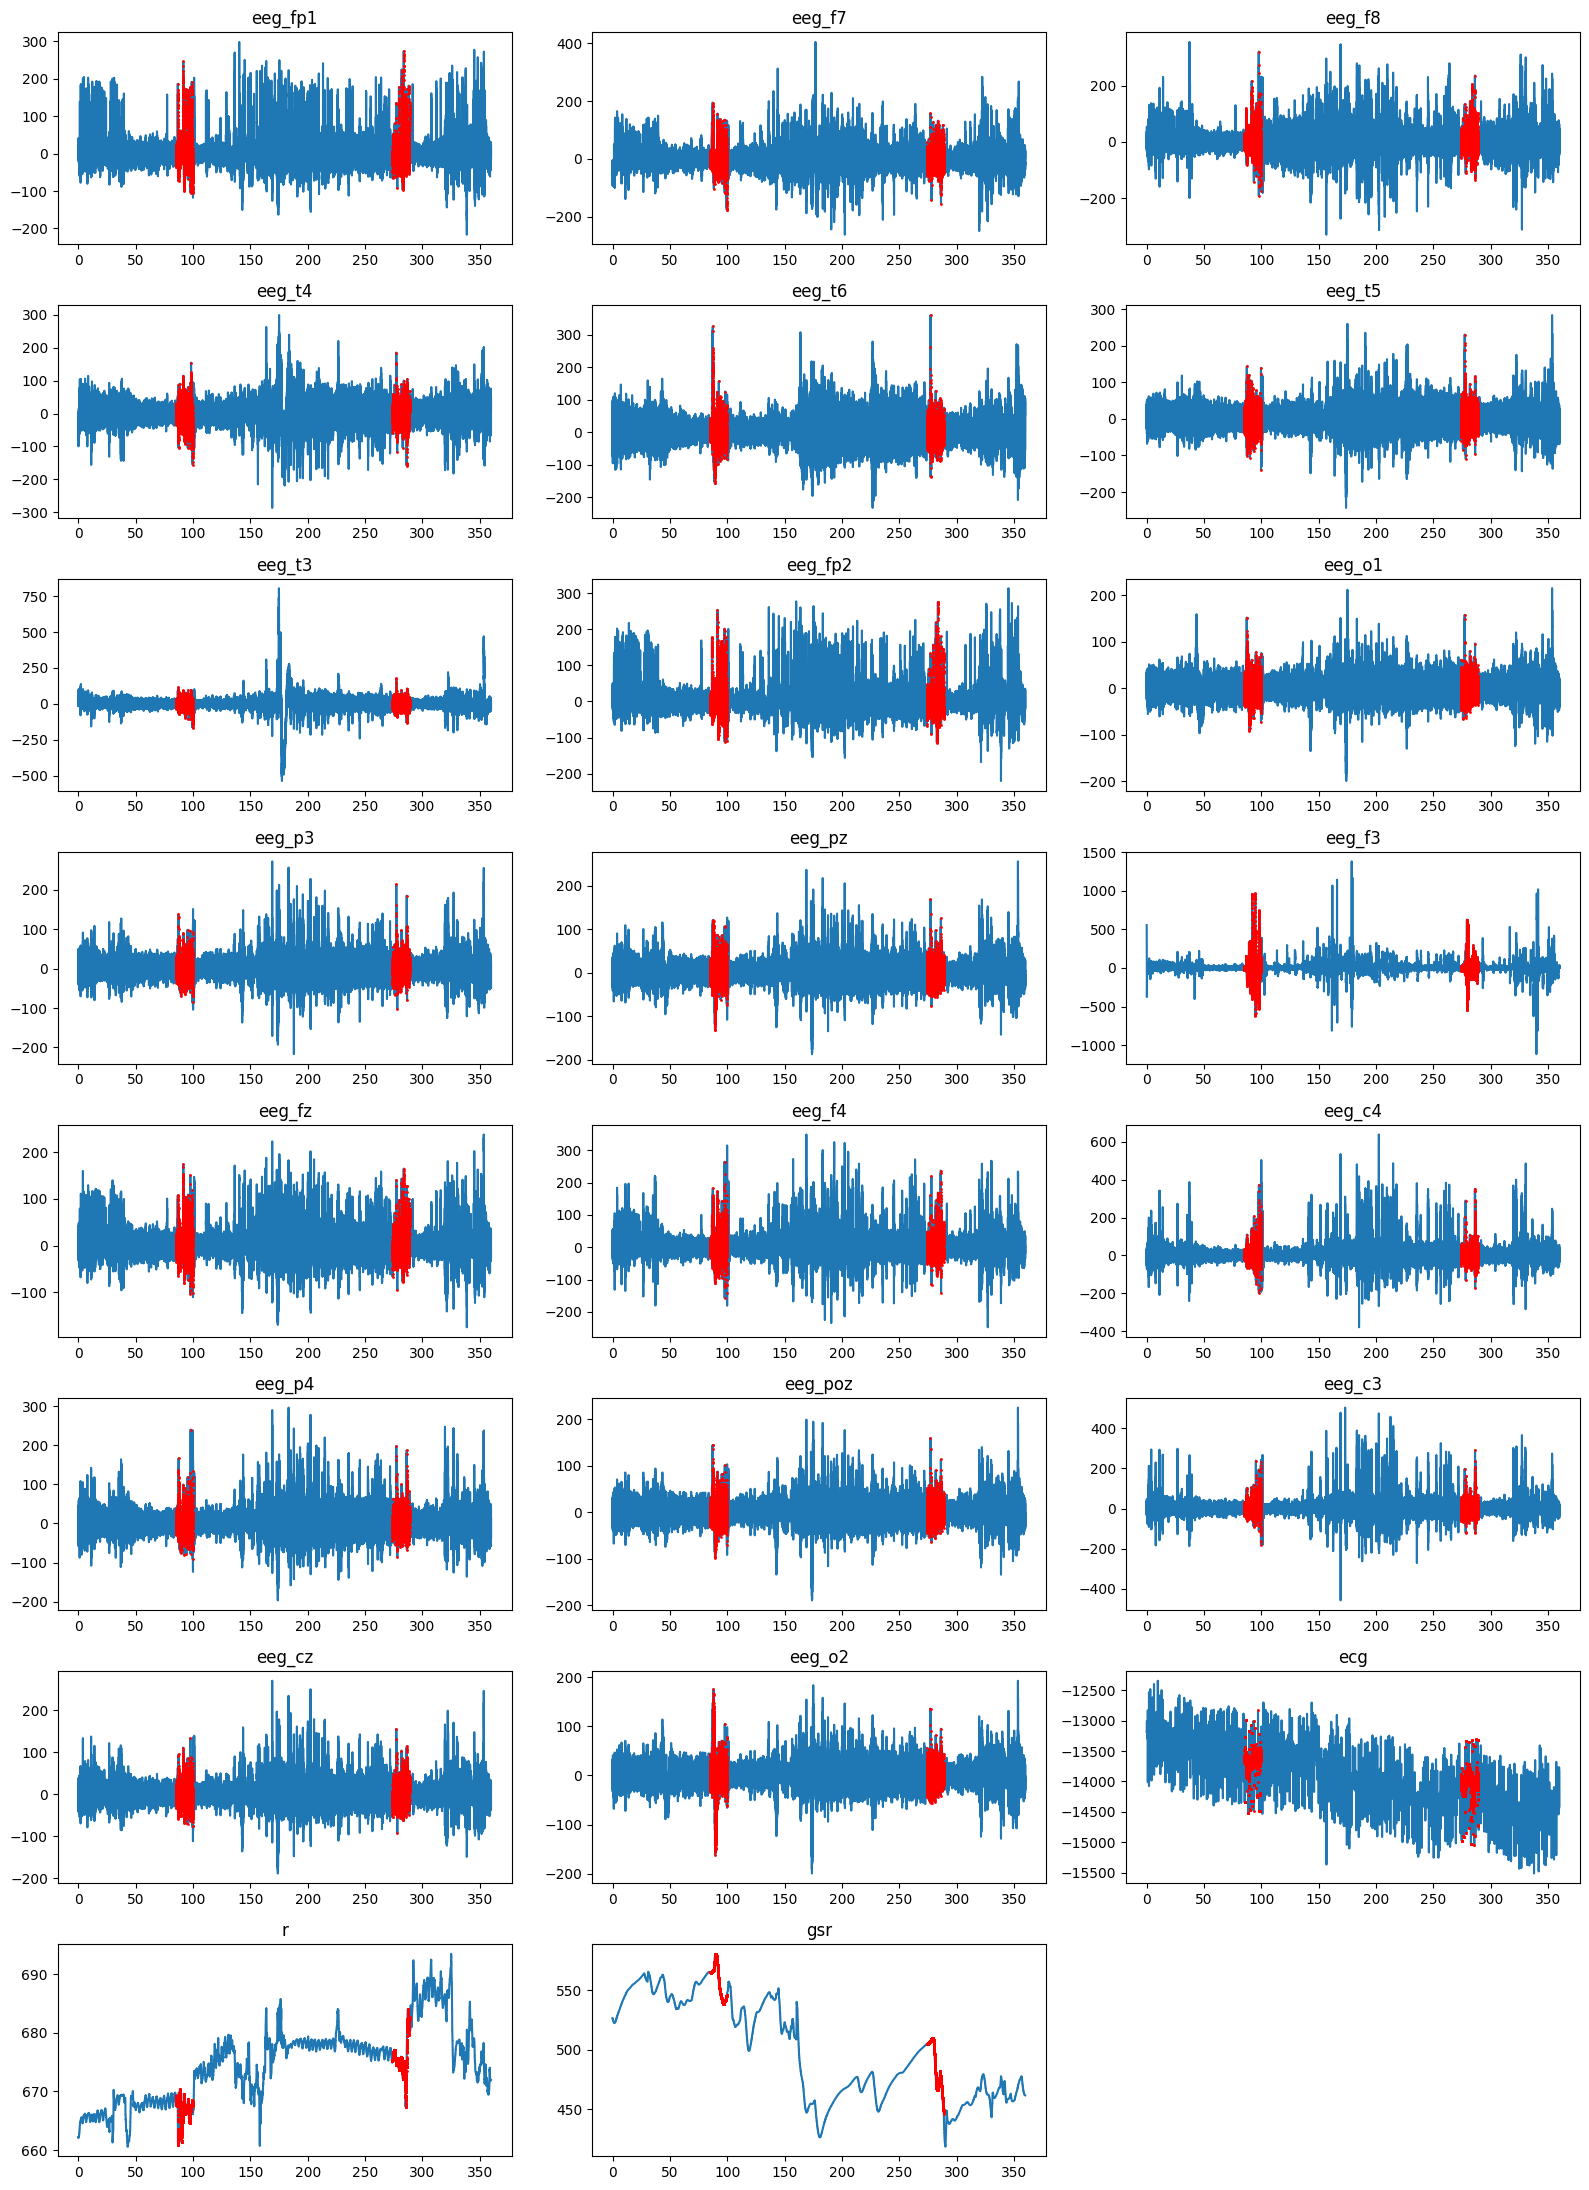

In [ ]:
# Crew 13, Pilot 0, Startle Surprise

crew = 13
seat = 0
exp = 'SS'
ev = 'B'

sel = (df_pilot.crew == crew) & (df_pilot.seat == seat) & (df_pilot.experiment == exp)
pilot_info = df_pilot.loc[sel,:].sort_values(by='time')


plt.figure(figsize=[16,22])
for i in range(4, 27):
    plt.subplot(8,3,i-3)
    plt.plot(pilot_info.time,
            pilot_info.iloc[:,i], zorder=1)
    plt.scatter(pilot_info.loc[pilot_info.event == ev,:].time,
               pilot_info.loc[pilot_info.event == ev,:].iloc[:,i], c='red', zorder=2, s=1)
    plt.title(pilot_info.columns[i])

plt.tight_layout()
plt.show()

In [ ]:
## Define the functions for feature extraction

In [5]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:])


def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts)

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*(m-1)):, :]
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0])

In [ ]:
# Extract features from raw data

In [6]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame
signals = ['eeg_fp1', 'eeg_f7', 'eeg_f8', 'eeg_t4', 'eeg_t6', 'eeg_t5', 'eeg_t3', 'eeg_fp2', 'eeg_o1', 'eeg_p3',
           'eeg_pz', 'eeg_f3', 'eeg_fz', 'eeg_f4', 'eeg_c4', 'eeg_p4', 'eeg_poz', 'eeg_c3', 'eeg_cz', 'eeg_o2',
           'ecg', 'r', 'gsr']


window_length = (4096)

# Assuming df_pilot is your DataFrame
data = []

# Process each crew and event
for (crew, seat, event), group in df_pilot.groupby(['crew', 'seat', 'event']):
    # Process each signal
    windows_data = []
    for signal in signals:
        subset = group[signal].dropna()  # Ensure NaNs are dropped
        if len(subset) >= window_length:
            num_windows = len(subset) // window_length
            windows = subset.values[:num_windows * window_length].reshape(-1, window_length)
            for i, window in enumerate(windows):
                op = ordinal_patterns(window, 4, 1) # play with dimesion and delay (recommended value of dimension = 3,4,5,6, delay = 1,2,3)
                pe = p_entropy(op)
                comp = complexity(op)
                windows_data.append({
                    'crew': crew,
                    'seat': seat,
                    'event': event,
                    f'pe_{signal}': pe,
                    f'comp_{signal}': comp
                })
        else:
            # Ensuring there is data for each signal type, even if NaN
            windows_data.append({
                'crew': crew,
                'seat': seat,
                'event': event,
                f'pe_{signal}': np.nan,
                f'comp_{signal}': np.nan
            })

    # We need to ensure each window's data across signals is combined into one record
    # This assumes there's an equal number of windows for each signal, otherwise this will need adjustment
    if windows_data:
        num_windows = len(windows_data) // len(signals)  # Calculate number of windows based on data length and number of signals
        for i in range(num_windows):
            entry = {}
            for window_data in windows_data[i::num_windows]:
                entry.update(window_data)
            data.append(entry)

# Convert to DataFrame
results_df = pd.DataFrame(data)

C:\Users\jeffj\AppData\Local\Temp\ipykernel_25832\2057355097.py:50: RuntimeWarning: invalid value encountered in scalar divide
  return(s_entropy(p)/max_entropy)
C:\Users\jeffj\AppData\Local\Temp\ipykernel_25832\2057355097.py:62: RuntimeWarning: divide by zero encountered in scalar divide
  Q_o = -1/(constant1+constant2+constant3)
C:\Users\jeffj\AppData\Local\Temp\ipykernel_25832\2057355097.py:67: RuntimeWarning: invalid value encountered in scalar multiply
  Comp_JS = Q_o * JSdivergence * pe


In [7]:
results_df.shape

(1149, 49)

In [8]:
results_df.isna().sum()

crew              0
seat              0
event             0
pe_eeg_fp1        2
comp_eeg_fp1      2
pe_eeg_f7         2
comp_eeg_f7       2
pe_eeg_f8         2
comp_eeg_f8       2
pe_eeg_t4         2
comp_eeg_t4       2
pe_eeg_t6         2
comp_eeg_t6       2
pe_eeg_t5         2
comp_eeg_t5       2
pe_eeg_t3         2
comp_eeg_t3       2
pe_eeg_fp2        2
comp_eeg_fp2      2
pe_eeg_o1         2
comp_eeg_o1       2
pe_eeg_p3         2
comp_eeg_p3       2
pe_eeg_pz         2
comp_eeg_pz       2
pe_eeg_f3         2
comp_eeg_f3       2
pe_eeg_fz         2
comp_eeg_fz       2
pe_eeg_f4         2
comp_eeg_f4       2
pe_eeg_c4         2
comp_eeg_c4       2
pe_eeg_p4         2
comp_eeg_p4       2
pe_eeg_poz        2
comp_eeg_poz      2
pe_eeg_c3         2
comp_eeg_c3       2
pe_eeg_cz         2
comp_eeg_cz       2
pe_eeg_o2         2
comp_eeg_o2       2
pe_ecg           22
comp_ecg         22
pe_r              2
comp_r            2
pe_gsr          106
comp_gsr        106
dtype: int64

In [9]:
# Replace values
results_df['state'] = results_df['event'].replace({'A': 'Baseline', 'B': 'Startle/Surprise', 'C': 'Channelized-Attention', 'D': 'Diverted-Attention'})

In [10]:
results_df.head()

crew  seat event  pe_eeg_fp1  comp_eeg_fp1  pe_eeg_f7  comp_eeg_f7  \
0     1     0     A    0.962960      0.047118   0.978569     0.027709   
1     1     0     A    0.971943      0.035798   0.983263     0.022061   
2     1     0     A    0.962349      0.048035   0.979061     0.027628   
3     1     0     A    0.965927      0.043520   0.983061     0.022143   
4     1     0     A    0.966704      0.043051   0.980912     0.024946   

   pe_eeg_f8  comp_eeg_f8  pe_eeg_t4  ...  comp_eeg_cz  pe_eeg_o2  \
0   0.979022     0.027234   0.983132  ...     0.063063   0.958847   
1   0.974494     0.033304   0.986097  ...     0.055601   0.966304   
2   0.975439     0.032203   0.982220  ...     0.059941   0.967626   
3   0.975629     0.032015   0.989625  ...     0.046620   0.970152   
4   0.973151     0.034919   0.980093  ...     0.067393   0.970758   

   comp_eeg_o2   pe_ecg  comp_ecg      pe_r    comp_r    pe_gsr  comp_gsr  \
0     0.051300  0.19469  0.150439  0.382829  0.241605  0.558457  0.264089   
1     0.042473      NaN       NaN  0.351348  0.226643  0.518345  0.279151   
2     0.041647      NaN       NaN  0.347619  0.232406  0.540586  0.278075   
3     0.038293      NaN       NaN  0.346609  0.232166  0.540483  0.257856   
4     0.037622      NaN       NaN  0.364486  0.242340  0.550431  0.269340   

      state  
0  Baseline  
1  Baseline  
2  Baseline  
3  Baseline  
4  Baseline  

[5 rows x 50 columns]

In [11]:
import time

In [12]:
# Map predictors and response

X_predictors = results_df.drop(['crew', 'seat', 'event', 'state'], axis=1)
Y_response =  results_df['state']
 

In [13]:
X_predictors.fillna(X_predictors.mean(), inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_predictors, Y_response, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Model 1: Logistic Regression
time_1_start = time.time()

model_1 = LogisticRegression(random_state=42)

model_1.fit(X_train, y_train)

y_pred_model_1 = model_1.predict(X_test)

time_1_end = time.time()
total_time_1 = time_1_end - time_1_start


c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Evaluate model
Logistic_Regression_report = classification_report(y_test, y_pred_model_1)
print(Logistic_Regression_report)

                       precision    recall  f1-score   support

             Baseline       0.72      0.84      0.78       131
Channelized-Attention       0.73      0.67      0.70        84
   Diverted-Attention       0.00      0.00      0.00        12
     Startle/Surprise       0.00      0.00      0.00         3

             accuracy                           0.72       230
            macro avg       0.36      0.38      0.37       230
         weighted avg       0.68      0.72      0.70       230



c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print('Log Reg time',total_time_1)

Log Reg time 0.051439762115478516


In [19]:
# Model 2: Neral networks MLP Classifier

time_2_start = time.time()

model_2 = MLPClassifier(random_state=42)

model_2.fit(X_train, y_train)

y_pred_model_2 = model_2.predict(X_test)

time_2_end = time.time()
total_time_2 = time_2_end - time_2_start

c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
MLP_report = classification_report(y_test, y_pred_model_2)
print(MLP_report)

                       precision    recall  f1-score   support

             Baseline       0.83      0.92      0.87       131
Channelized-Attention       0.86      0.85      0.85        84
   Diverted-Attention       0.67      0.17      0.27        12
     Startle/Surprise       0.00      0.00      0.00         3

             accuracy                           0.84       230
            macro avg       0.59      0.48      0.50       230
         weighted avg       0.82      0.84      0.82       230



c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
print('MLP time',total_time_2)

MLP time 0.8473715782165527


In [22]:
# Model 3: Decision Tree

time_3_start = time.time()

model_3 = DecisionTreeClassifier(random_state=42)

model_3.fit(X_train,y_train)

y_pred_model_3 = model_3.predict(X_test)

time_3_end = time.time()
total_time_3 = time_3_end - time_3_start

In [23]:
DT_report = classification_report(y_test, y_pred_model_3)
print(DT_report)

                       precision    recall  f1-score   support

             Baseline       0.77      0.76      0.76       131
Channelized-Attention       0.70      0.74      0.72        84
   Diverted-Attention       0.12      0.08      0.10        12
     Startle/Surprise       0.00      0.00      0.00         3

             accuracy                           0.70       230
            macro avg       0.40      0.39      0.39       230
         weighted avg       0.70      0.70      0.70       230



In [24]:
print('DT time',total_time_3)

DT time 0.11834073066711426


In [26]:
# GridsearchCV Logistic model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

X = results_df.drop(['crew', 'seat', 'event', 'state'], axis=1)
y =  results_df['state']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_4_start = time.time()

# Creating a pipeline
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=1000))
])

# Parameters for GridSearchCV
param_grid = {
    'logreg__C': np.logspace(-4, 4, 20),
    'logreg__penalty': ['l1', 'l2'],
    'logreg__solver': ['sag', 'saga', 'liblinear', 'newton-cg']
}

# Scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_score': make_scorer(f1_score, average='macro')}

# Create Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Collecting all the results in a DataFrame
results_1 = pd.DataFrame(grid_search.cv_results_)

time_4_end = time.time()
total_time_4 = time_4_end - time_4_start

c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

In [27]:
# Print the best parameters found
print("Best logreg parameters found:", grid_search.best_params_)

# Print the best score found
print("Best logreg accuracy score:", grid_search.best_score_)

print('tuned Log Reg time',total_time_4)

Best logreg parameters found: {'logreg__C': 29.763514416313132, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best logreg accuracy score: 0.7257662152530292
tuned Log Reg time 459.7747976779938


In [29]:
# GridsearchCV MLP
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

X = results_df.drop(['crew', 'seat', 'event', 'state'], axis=1)
y =  results_df['state']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_5_start = time.time()

# Creating a pipeline
pipeline_2 = Pipeline([
        ('scaler', StandardScaler()),
        ('mlp', MLPClassifier(max_iter=1000))
])

# Parameters for GridSearchCV
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__learning_rate': ['constant', 'adaptive'],
}

# Scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_score': make_scorer(f1_score, average='macro')}

# Create Grid Search
grid_search_2 = GridSearchCV(pipeline_2, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit Grid Search to the training data
grid_search_2.fit(X_train, y_train)

time_5_end = time.time()
total_time_5 = time_5_end - time_5_start

c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000

In [30]:
# Print the best parameters found
print("Best MLP parameters found:", grid_search_2.best_params_)

# Print the best score found
print("Best MLP accuracy score:", grid_search_2.best_score_)

print('Tuned MLP time',total_time_5)

Best MLP parameters found: {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate': 'adaptive', 'mlp__solver': 'sgd'}
Best MLP accuracy score: 0.8476597766690425
Tuned MLP time 2817.180021762848


In [31]:
# Gridsearch DT

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

X = results_df.drop(['crew', 'seat', 'event', 'state'], axis=1)
y =  results_df['state']

X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

time_6_start = time.time()

# Creating a pipeline
pipeline_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('DT', DecisionTreeClassifier())
])

# Parameters for GridSearchCV
param_grid = {
    'DT__max_depth': [None, 10, 15, 20, 30],
    'DT__min_samples_split': [2, 5, 10],
    'DT__min_samples_leaf': [1, 2, 4],
    'DT__criterion': ['gini', 'entropy']
}

# Scoring metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1_score': make_scorer(f1_score, average='macro')}

# Create Grid Search
grid_search_3 = GridSearchCV(pipeline_3, param_grid, cv=5, scoring=scoring, refit='accuracy', return_train_score=True)

# Fit Grid Search to the training data
grid_search_3.fit(X_train, y_train)

time_6_end = time.time()
total_time_6 = time_6_end - time_6_start

c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jeffj\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedM

In [32]:
# Print the best parameters found
print("Best DT parameters found:", grid_search_3.best_params_)

# Print the best score found
print("Best DT accuracy score:", grid_search_3.best_score_)

print('Tuned DT time',total_time_6)

Best DT parameters found: {'DT__criterion': 'gini', 'DT__max_depth': 15, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}
Best DT accuracy score: 0.7290627227369921
Tuned DT time 37.59880447387695
